# Excercise Preprocessing

preprocess v1 scheme:  
* one hot encoding : sex, smoker, time
* ordinal encoding : day
* no treatment : size, total_bill

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

import category_encoders as ce

from sklearn.model_selection import train_test_split # data splitting
from sklearn.linear_model import Ridge # ML model
from sklearn.metrics import mean_squared_error # evaluation
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [5]:
# load data set
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Preprocessing

## Data Splitting

In [6]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [7]:
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=10
)

## Mengaplikasikan transformer pada column tertentu

In [9]:
# Mapping (memberikan nilai pada setiap value)
ordinal_mapping = [{
    'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}
}]

In [10]:
# membuat beberapa transformer untuk columns tertentu
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first'), ['sex','smoker','time']),
    ('ordinal encoder', ce.OrdinalEncoder(cols='day', mapping=ordinal_mapping), ['day'])
    ], remainder='passthrough')

## Data Transforming

In [11]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


In [12]:
# fitting AND transforming X_train
X_train_preprocessed = transformer.fit_transform(X_train)

# transforming X_test
X_test_preprocessed = transformer.transform(X_test)

# cukup fitting X_train aja, agar fittingnya (misal scalingnya) menyusaikan yg X_train aja. 

In [13]:
# ini bentuknya masih array
X_train_preprocessed

array([[ 1.  ,  1.  ,  0.  ,  3.  , 11.24,  2.  ],
       [ 1.  ,  0.  ,  0.  ,  4.  , 10.34,  3.  ],
       [ 1.  ,  0.  ,  0.  ,  4.  , 21.01,  3.  ],
       ...,
       [ 1.  ,  0.  ,  0.  ,  3.  , 13.28,  2.  ],
       [ 0.  ,  0.  ,  1.  ,  1.  , 29.8 ,  6.  ],
       [ 1.  ,  0.  ,  0.  ,  4.  , 14.78,  2.  ]])

In [14]:
# rename columns DataFrame kita mengunakan sklearn

#  ubah array menjadi dataframe
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed

,0,1,2,3,4,5
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,0.0,3.0,17.59,3.0
179,1.0,0.0,0.0,4.0,21.58,2.0
180,1.0,0.0,0.0,3.0,13.28,2.0
181,0.0,0.0,1.0,1.0,29.80,6.0


In [15]:
# menampilkan nama-nama transformer dalam variable transformer (dgn menggunakan fungsi transformers_)

transformer.transformers_

[('encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker', 'time']),
 ('ordinal encoder',
  OrdinalEncoder(cols=['day'], drop_invariant=False, handle_missing='value',
                 handle_unknown='value',
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}}],
                 return_df=True, verbose=0),
  ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [16]:
# Mengubah nama columns yg menggunakan OneHot Encoder
features_onehot = transformer.transformers_[0][1].get_feature_names()
features_onehot

array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [17]:
# Mengubah nama columns yg menggunakan Ordinal Encoder
features_ordinal = transformer.transformers_[1][1].get_feature_names()
features_ordinal

['day']

In [18]:
# Memasukkan nama columns
features = list(features_onehot) + features_ordinal + ['total_bill', 'size']
features

['x0_Male', 'x1_Yes', 'x2_Lunch', 'day', 'total_bill', 'size']

In [19]:
# mengubah nama columns pada X_train dan X_test sesuai dengan variable 'features'

X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

X_train_preprocessed

,x0_Male,x1_Yes,x2_Lunch,day,total_bill,size
0,1.0,1.0,0.0,3.0,11.24,2.0
1,1.0,0.0,0.0,4.0,10.34,3.0
2,1.0,0.0,0.0,4.0,21.01,3.0
3,1.0,0.0,0.0,3.0,20.23,2.0
4,1.0,1.0,0.0,4.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,0.0,3.0,17.59,3.0
179,1.0,0.0,0.0,4.0,21.58,2.0
180,1.0,0.0,0.0,3.0,13.28,2.0
181,0.0,0.0,1.0,1.0,29.80,6.0


# Model Fitting and Evaluation 1:
    Ridge Regression 

In [20]:
# fitting data menggunakan train set yg telah di-prepocessed (discaling/diencoding)

model = Ridge()
model.fit(X_train_preprocessed, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [21]:
# prediksi (tes datanya)

y_predict = model.predict(X_test_preprocessed)
print('MSE:', mean_squared_error(y_predict, y_test))

MSE: 1.0646880941658141


# Model Properties

In [22]:
coef_table = pd.DataFrame({
    'features': features,
    'coef': model.coef_
})

coef_table

,features,coef
0,x0_Male,-0.226361
1,x1_Yes,-0.063728
2,x2_Lunch,0.148759
3,day,0.025490
4,total_bill,0.099402
5,size,0.165508


# Model Fitting and Evaluation 2:

    DecisionTreeRegressor

In [23]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train_preprocessed, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [24]:
# MSE unitnya masih kuadratnya y 
# MSE selisih antara hasil prediksi dgn data nyata (y pred - y test), dipangkat 2, dijumlah, dan dirata-rata

y_predict = model.predict(X_test_preprocessed)
print('MSE:', mean_squared_error(y_predict, y_test))

MSE: 0.8414314225960589


In [25]:
# RMSE unitnya sudah sama dengan y (karena diakar)

print('RMSE:', mean_squared_error(y_predict, y_test)**0.5)

RMSE: 0.9172957116415943


In [26]:
# hasil prediksi kita punya error sebesar 0.84
# berarti errornya cukup kecil (lebih kecil dari ridge regression)

# Model Properties

In [27]:
# Feature Importance
importance_table = pd.DataFrame({
    'imp': model.feature_importances_
}, index=features)

importance_table

,imp
x0_Male,0.000000
x1_Yes,0.108978
x2_Lunch,0.000000
day,0.000000
total_bill,0.891022
size,0.000000


importance paling tinggi berarti feature yg paling penting

dalam dataset tips ini, feature paling penting (most important) adalah total_bill dgn score 0.89

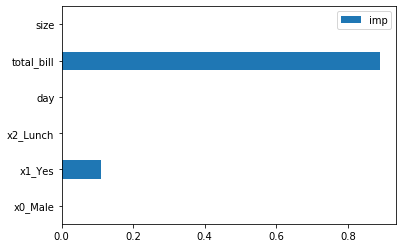

In [28]:
importance_table.plot(kind='barh')

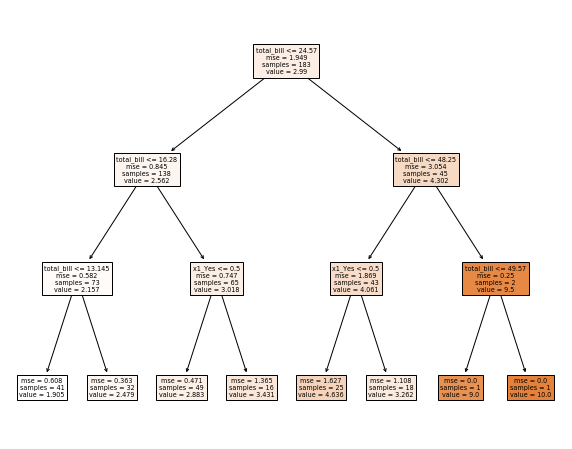

In [29]:
plt.figure(figsize=(10,8))
plot_tree(model, feature_names= features, filled=True)
plt.show()

# cabang ke bawah kiri jika condition terpenuhi 

preprocess v2:

- one hot encoding : sex, smoker
- ordinal encoding : time, day
- no treatment : size, total_bill

gunakan scheming di atas untuk decision tree regressor

bandingkan hasilnya dengan scheme sebelum ini


## Data Splitting

In [30]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [31]:
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]
y = tips['tip']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state = 10
)


In [33]:
X_train.head()

,total_bill,sex,smoker,day,time,size
58,11.24,Male,Yes,Sat,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3
68,20.23,Male,No,Sat,Dinner,2
184,40.55,Male,Yes,Sun,Dinner,2


## Data Transform

In [34]:
# Mapping (memberikan nilai pada setiap value)
ordinal_mapping = [
    {'col':'day',
    'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4}},
    {'col':'time',
    'mapping':{None:0, 'Lunch':1, 'Dinner':2}}
]

In [35]:
ordinal_mapping

[{'col': 'day', 'mapping': {None: 0, 'Thur': 1, 'Fri': 2, 'Sat': 3, 'Sun': 4}},
 {'col': 'time', 'mapping': {None: 0, 'Lunch': 1, 'Dinner': 2}}]

In [36]:
# membuat beberapa transformer untuk columns tertentu
transformer = ColumnTransformer([
    ('encoder', OneHotEncoder(drop='first'), ['sex','smoker']),
    ('ordinal encoder', ce.OrdinalEncoder(cols=['day','time'], mapping=ordinal_mapping), ['day','time'])
    ], remainder='passthrough')

In [37]:
# fitting AND transforming X_train
X_train_preprocessed = transformer.fit_transform(X_train) 

# transforming X_test
X_test_preprocessed = transformer.transform(X_test)

In [38]:
#  ubah array menjadi dataframe
X_train_preprocessed = pd.DataFrame(X_train_preprocessed)
X_test_preprocessed = pd.DataFrame(X_test_preprocessed)

X_train_preprocessed # sudah berubah jadi dataframe

,0,1,2,3,4,5
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0
...,...,...,...,...,...,...
178,1.0,0.0,3.0,2.0,17.59,3.0
179,1.0,0.0,4.0,2.0,21.58,2.0
180,1.0,0.0,3.0,2.0,13.28,2.0
181,0.0,0.0,1.0,1.0,29.80,6.0


In [39]:
transformer.transformers_

[('encoder',
  OneHotEncoder(categories='auto', drop='first', dtype=<class 'numpy.float64'>,
                handle_unknown='error', sparse=True),
  ['sex', 'smoker']),
 ('ordinal encoder',
  OrdinalEncoder(cols=['day', 'time'], drop_invariant=False,
                 handle_missing='value', handle_unknown='value',
                 mapping=[{'col': 'day',
                           'mapping': {None: 0, 'Fri': 2, 'Sat': 3, 'Sun': 4,
                                       'Thur': 1}},
                          {'col': 'time',
                           'mapping': {None: 0, 'Dinner': 2, 'Lunch': 1}}],
                 return_df=True, verbose=0),
  ['day', 'time']),
 ('remainder', 'passthrough', [0, 5])]

In [40]:
# Mengubah nama columns yg menggunakan OneHot Encoder
transformer.transformers_[0][1].get_feature_names()

array(['x0_Male', 'x1_Yes'], dtype=object)

In [41]:
# Mengubah nama columns yg menggunakan Ordinal Encoder
transformer.transformers_[1][1].get_feature_names()

['day', 'time']

In [42]:
# Memasukkan nama columns
features = list(transformer.transformers_[0][1].get_feature_names()) + transformer.transformers_[1][1].get_feature_names() + ['total_bill','size']

features

['x0_Male', 'x1_Yes', 'day', 'time', 'total_bill', 'size']

In [43]:
# mengubah nama columns pada X_train dan X_test sesuai dengan variable 'features'
X_train_preprocessed.columns = features
X_test_preprocessed.columns = features

In [44]:
X_train_preprocessed.head() # DataFrame sudah berubah nama column nya, sudah siap di-fitting

,x0_Male,x1_Yes,day,time,total_bill,size
0,1.0,1.0,3.0,2.0,11.24,2.0
1,1.0,0.0,4.0,2.0,10.34,3.0
2,1.0,0.0,4.0,2.0,21.01,3.0
3,1.0,0.0,3.0,2.0,20.23,2.0
4,1.0,1.0,4.0,2.0,40.55,2.0


## Model Fitting and Evaluation

In [45]:
# fitting data menggunakan train set
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train_preprocessed, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
# prediksi (kita tes datanya)
y_pred = model.predict(X_test_preprocessed)
print('mse:', mean_squared_error(y_test, y_pred))

mse: 0.841431422596059


In [47]:
# RMSE unitnya sudah sama dengan y (karena diakar)
print('RMSE:', mean_squared_error(y_predict, y_test)**0.5)

RMSE: 0.9172957116415943


In [48]:
# Feature Importance
importance_table = pd.DataFrame({
    'imp': model.feature_importances_
}, index=features)

importance_table

,imp
x0_Male,0.000000
x1_Yes,0.108978
day,0.000000
time,0.000000
total_bill,0.891022
size,0.000000


### Hasil MSE nya sama dengan sebelumnya karena column 'time' yg awalnya menggunakan OneHot Encoder lalu diganti menjadi menggunakan Ordinal Encoder memiliki importance 0, jadi tidak berpengaruh.

# Outliers

In [49]:
x = list(np.random.uniform(155,165,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]


In [50]:
df_assotiation = pd.DataFrame({'x':x, 'y':y, 'y_real':y_real})
df_assotiation

,x,y,y_real
0,162.54,59.08,58.89
1,160.03,57.56,58.01
2,162.33,59.75,58.82
3,162.56,60.27,58.90
4,163.45,59.88,59.21
...,...,...,...
95,159.84,57.14,57.94
96,158.75,56.51,57.56
97,160.79,57.88,58.28
98,160.03,58.17,58.01


Text(0, 0.5, 'Weight (Kg)')

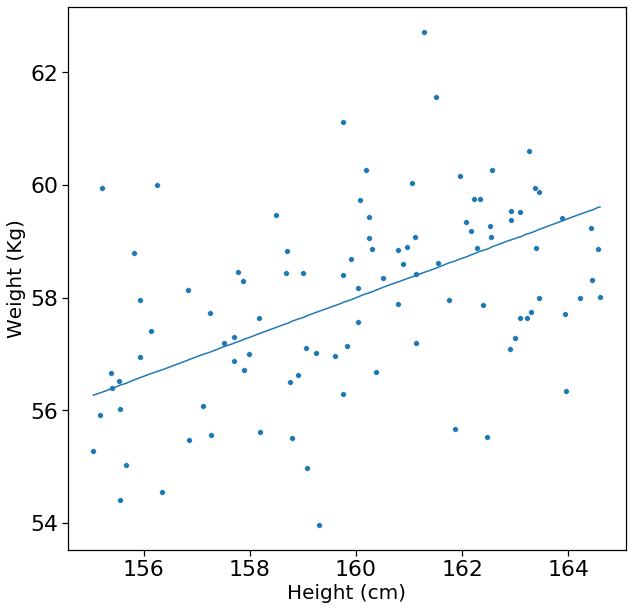

In [51]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation)
sns.lineplot(x='x',y='y_real',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)


# Global Oulier

data points yg jauh dari keseluruhan data

In [52]:
x = [191,190]
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_outlier = df_assotiation.append(df_add)
df_assotiation_outlier

,x,y,y_real
0,162.54,59.08,58.89
1,160.03,57.56,58.01
2,162.33,59.75,58.82
3,162.56,60.27,58.90
4,163.45,59.88,59.21
...,...,...,...
97,160.79,57.88,58.28
98,160.03,58.17,58.01
99,161.12,59.08,58.39
0,191.00,66.93,68.85


Text(0, 0.5, 'Weight (Kg)')

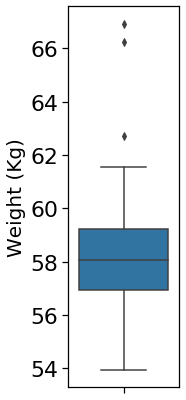

In [53]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_outlier['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)


Text(0.5, 0, 'Height (cm)')

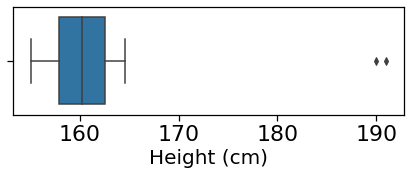

In [54]:
plt.figure(figsize=(7,2))
sns.boxplot(x = df_assotiation_outlier['x'])
plt.xlabel('Height (cm)', fontsize = 20)


# Contextual Outlier

    data point yg keluar dari data point dgn context yg sama: 
    (bisa dibandingkan dgn 2 feature)

    bb: 66 tb:155

kalau liat tinggi badan secara umum, dia belum tentu global outlier karena masih banyak juga yg tingginya segitu, tapi dia jadi context outlier karena   walaupun tinggi badan masih wajar, tapi berat badannya ga wajar untuk tinggi segitu

In [55]:
x = list(np.random.uniform(155,175,100))
x = [round(i,2) for i in x]

y = [(2 + 0.35*i + np.asscalar(np.random.normal(0,1.5,1))) for i in x]
y = [round(i,2) for i in y]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]


In [56]:
x = [155,157]

y = [66,67]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_contextual = df_assotiation.append(df_add)
df_assotiation_contextual

,x,y,y_real
0,162.54,59.08,58.89
1,160.03,57.56,58.01
2,162.33,59.75,58.82
3,162.56,60.27,58.90
4,163.45,59.88,59.21
...,...,...,...
97,160.79,57.88,58.28
98,160.03,58.17,58.01
99,161.12,59.08,58.39
0,155.00,66.00,56.25


Text(0, 0.5, 'Weight (Kg)')

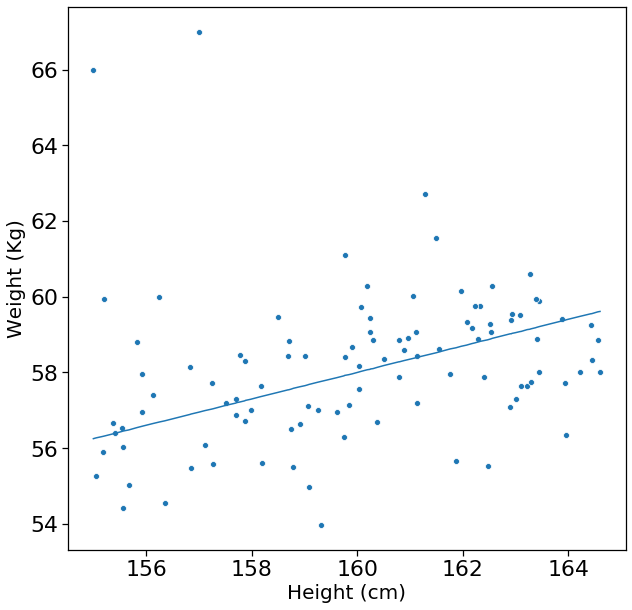

In [57]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation_contextual)
sns.lineplot(x='x',y='y_real',data = df_assotiation_contextual)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)


# Collective Outliers

tidak sesuai pola. data time series, data spasial.

misal tiap tahun jan-jun hujan, jul-des kemarau, tapi tahun 2016 hanya gerimis sepanjang tahun

secara umum, curah hujan 2016 bukan global otlier karena masih dalam range curah hujan wajar, tapi secara pola, dia keluar pola, karena harusnya ada kenaikan curah hujan di jan-jun dan penurunan curah hujan di jul-des (dia malah curah hujan sedang sepanjang tahun).

# Influential Observation

Tidak Merusak Pola: jika global outlier, tapi secara pattern masih di gasi regresi

Merusak Pola: Influential Observation, ketika ada outlier, garis regresi jadi berubah.

In [58]:
x = [170, 171, 173, 180]

y = [91, 95, 95, 100]

y_real = [(2 + 0.35*i) for i in x]
y_real = [round(i,2) for i in y_real]

df_add = pd.DataFrame({
    'x':x,
    'y':y,
    'y_real':y_real
})

df_assotiation_influenced = df_assotiation.append(df_add)
df_assotiation_influenced

,x,y,y_real
0,162.54,59.08,58.89
1,160.03,57.56,58.01
2,162.33,59.75,58.82
3,162.56,60.27,58.90
4,163.45,59.88,59.21
...,...,...,...
99,161.12,59.08,58.39
0,170.00,91.00,61.50
1,171.00,95.00,61.85
2,173.00,95.00,62.55


Text(0, 0.5, 'Weight (Kg)')

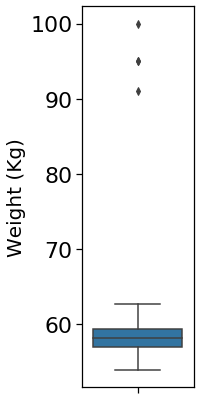

In [59]:
plt.figure(figsize=(2,7))
sns.boxplot(y = df_assotiation_influenced['y'])
plt.ylabel('Weight (Kg)', fontsize = 20)

Text(0, 0.5, 'Weight (Kg)')

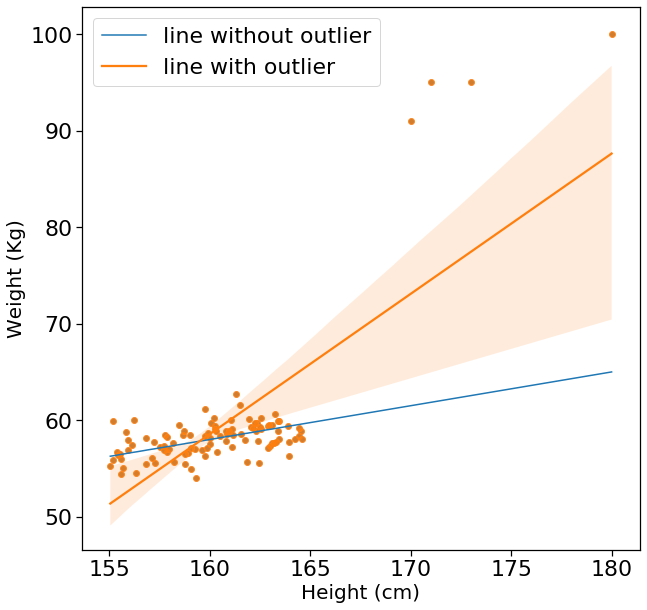

In [60]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.scatterplot(x='x',y='y',data = df_assotiation_influenced)
sns.lineplot(x='x',y='y_real',data = df_assotiation_influenced)
sns.regplot(x='x',y='y',data = df_assotiation_influenced)
plt.legend(['line without outlier','line with outlier'], loc = 'upper left')
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)



Text(0.5, 1.0, 'residual plot if outlier included')

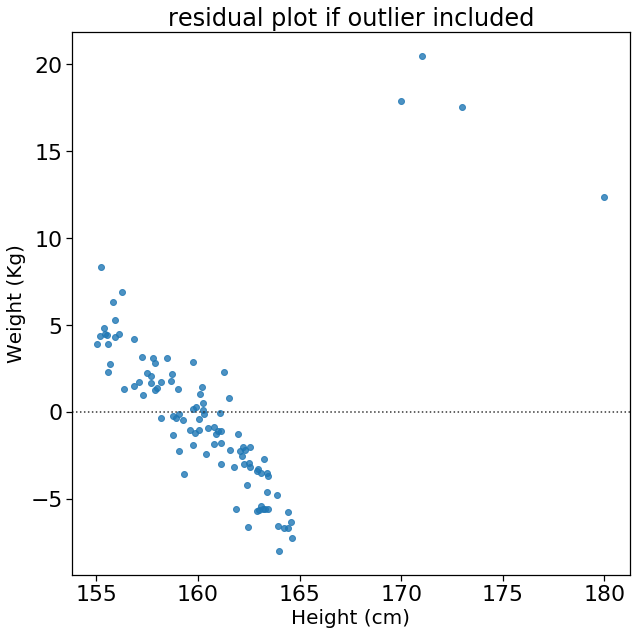

In [61]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.residplot(x='x',y='y',data = df_assotiation_influenced)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier included')

Text(0.5, 1.0, 'residual plot if outlier excluded')

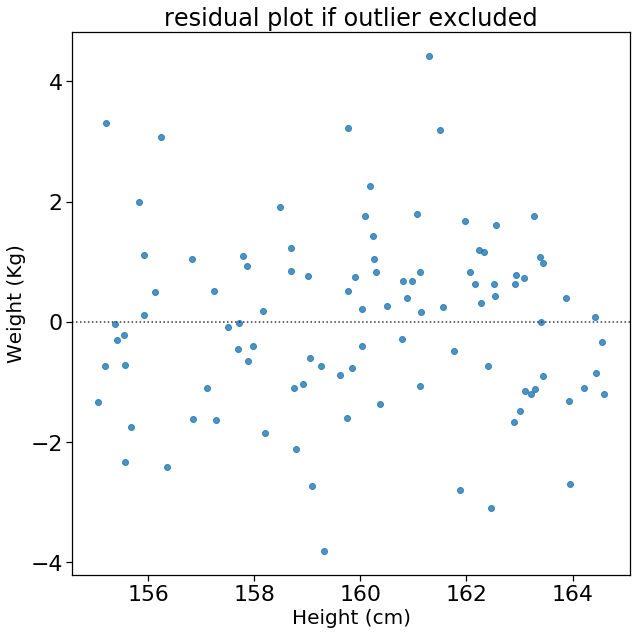

In [62]:
plt.figure(figsize=(10,10))
sns.set_context('notebook',font_scale=2)
sns.residplot(x='x',y='y',data = df_assotiation)
plt.xlabel('Height (cm)', fontsize = 20)
plt.ylabel('Weight (Kg)', fontsize = 20)
plt.title('residual plot if outlier excluded')


## Apa yg harus dilakukan ketika bertemu outlier?

- treat a missing data
- drop it
- change the value

# Missing Values

# Simple Imputer

In [63]:
from sklearn.impute import SimpleImputer

In [64]:
df = pd.DataFrame({
    'x1':[4,5,np.nan,6,7,9],
    'x2':[3,5,6,5,np.nan,5],
    'x3':[10,11,12,9,8,11],
    'x4':['A','A','C','C','D',np.nan],
    'x5':['X','Y','X','X',np.nan,'Y'],
    'x6':['M','M',np.nan,'M','N',np.nan]
    })


In [65]:
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10,A,X,M
1,5.0,5.0,11,A,Y,M
2,NaN,6.0,12,C,X,NaN
3,6.0,5.0,9,C,X,M
4,7.0,NaN,8,D,NaN,N
5,9.0,5.0,11,NaN,Y,NaN


input missing value untuk setiap numerical variable, menggunakan mean-nya masing2

In [66]:
imp_num = SimpleImputer(strategy='mean')
df[['x1','x2','x3']] = imp_num.fit_transform(df[['x1','x2','x3']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,NaN,N
5,9.0,5.0,11.0,NaN,Y,NaN


input missing value untuk setiap categorical variable, menggunakan mode-nya masing2

In [67]:

imp_cat = SimpleImputer(strategy='most_frequent')
df[['x4','x5']] = imp_cat.fit_transform(df[['x4','x5']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,NaN
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,NaN


input missing value dengan value tertentu

In [68]:
imp_const = SimpleImputer(strategy='constant', fill_value='p')
df[['x6']] = imp_const.fit_transform(df[['x6']])
df

,x1,x2,x3,x4,x5,x6
0,4.0,3.0,10.0,A,X,M
1,5.0,5.0,11.0,A,Y,M
2,6.2,6.0,12.0,C,X,p
3,6.0,5.0,9.0,C,X,M
4,7.0,4.8,8.0,D,X,N
5,9.0,5.0,11.0,A,Y,p


## Excersice

Gunakan simple imputer untuk mengisi missing value pada dataset mpg dengan rata-rata dan median dari featurenya.


In [69]:
df = sns.load_dataset('mpg') 

In [70]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [71]:
mpg_mean = df.copy()
imp_horse_mean = SimpleImputer(strategy='mean')
mpg_mean[['horsepower']] = imp_horse_mean.fit_transform(mpg_mean[['horsepower']])
mpg_mean.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [72]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [73]:
mpg_median = df.copy()
imp_horse_med = SimpleImputer(strategy='median')
mpg_median[['horsepower']] = imp_horse_med.fit_transform(mpg_median[['horsepower']])
mpg_median.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [74]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Take home exercise:  
Gunakan melb_data.csv dan isilah missing data pada dataset ini menggunakan simple imputer.  
Gunakan strategi yang sesuai. 


# ITERATIVE IMPUTER

Hanya untuk data numerikal

In [75]:
from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import IterativeImputer

In [81]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })


In [82]:
df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [83]:
df.describe()

,x1,x2,x3
count,5.000000,5.0000,5.000000
mean,6.440000,4.9200,9.820000
std,1.896839,1.2498,1.125611
min,4.300000,2.9000,8.900000
25%,5.100000,4.9000,9.000000
50%,6.300000,5.1000,9.100000
75%,7.400000,5.4000,11.000000
max,9.100000,6.3000,11.100000


In [84]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)

df[['x1','x2','x3']] = imp_iter.fit_transform(df[['x1','x2','x3']])

# bisa isi dgn parameter missung_value (contoh: np.NaN, 999, 0)

In [85]:
df

,x1,x2,x3,x4
0,4.30000,2.900000,9.000000,A
1,5.10000,5.100000,11.100000,A
2,7.18363,6.300000,9.823389,C
3,6.30000,4.900000,8.900000,C
4,7.40000,5.073866,9.100000,D
5,9.10000,5.400000,11.000000,D


### bisa kita lihat, missing value terisi bukan dengan mean, median, atau modus

# Nearest Neighbors Imputer

In [87]:
from sklearn.impute import KNNImputer

In [88]:
df = pd.DataFrame({
    'x1':[4.3,5.1,np.nan,6.3,7.4,9.1],
    'x2':[2.9,5.1,6.3,4.9,np.nan,5.4],
    'x3':[9,11.1,np.nan,8.9,9.1,11.0],
    'x4':['A','A','C','C','D','D']
    })

df

,x1,x2,x3,x4
0,4.3,2.9,9.0,A
1,5.1,5.1,11.1,A
2,NaN,6.3,NaN,C
3,6.3,4.9,8.9,C
4,7.4,NaN,9.1,D
5,9.1,5.4,11.0,D


In [90]:
imp_knn = KNNImputer(n_neighbors=2, weights='uniform')

df[['x1','x2','x3']] = imp_knn.fit_transform(df[['x1','x2','x3']])

df

,x1,x2,x3,x4
0,4.3,2.90,9.00,A
1,5.1,5.10,11.10,A
2,7.1,6.30,11.05,C
3,6.3,4.90,8.90,C
4,7.4,5.15,9.10,D
5,9.1,5.40,11.00,D


## melb_data

In [91]:
# load data 
melb = pd.read_csv('melb_data.csv')
melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [94]:
melb_outlier = pd.DataFrame(melb.isna().sum(), columns=['jml'])
melb_outlier

# columns yg memiliki outliers 
melb_outlier = melb_outlier.loc[melb_outlier['jml'] != 0,:]
melb_outlier

,jml
Car,62
BuildingArea,6450
YearBuilt,5375
CouncilArea,1369


In [99]:
melb.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,28.972246,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1960.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1964.684217,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1975.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [107]:
melb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13580 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   13580 non-null  float64
 15  YearBuilt      13580 non-null  float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [115]:
imp_iter = IterativeImputer(max_iter=10, random_state=0)

melb[['Car','BuildingArea','YearBuilt']] = imp_iter.fit_transform(melb[['Car','BuildingArea','YearBuilt']])

melb[['Car','BuildingArea','YearBuilt']]

,Car,BuildingArea,YearBuilt
0,1.0,63.0,1964.684217
1,0.0,79.0,1900.000000
2,0.0,150.0,1900.000000
3,1.0,63.0,1964.684217
4,2.0,142.0,2014.000000
...,...,...,...
13575,2.0,202.0,1981.000000
13576,2.0,133.0,1995.000000
13577,4.0,241.5,1997.000000
13578,5.0,157.0,1920.000000


In [118]:
imp_knn = KNNImputer(n_neighbors=2, weights='uniform')

melb[['Car','BuildingArea','YearBuilt']] = imp_knn.fit_transform(melb[['Car','BuildingArea','YearBuilt']])

melb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,63.0,1964.684217,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.000000,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.000000,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,63.0,1964.684217,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.000000,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


# Generate New Feature : Polynomial

- regresi linear: bentuknya garis lurus
- regresi non-linear: bentuknya kurva atau yg lainnya.

Polynomial termasuk non-linear

- second order = X**2
- k-th order = X**k

degree = pangkat

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [144]:
wine = pd.read_csv('white_wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0


Quality:
- good > 6
- bad <= 6

In [145]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
dtype: int64

In [146]:
wine['alcohol'].fillna(wine['alcohol'].mean(), inplace=True)

In [147]:
wine['label'] = [1 if i>6 else 0 for i in wine['quality']]
wine['label'].value_counts()

0    422
1     98
Name: label, dtype: int64

In [148]:
X = wine[['density','alcohol']]
y = wine['label']

In [149]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    stratify=y, # distratify karena jumlah label tidak seimbang (422:98)
    random_state=2020
)

In [150]:
# dengan Logistic Regression sbelum dipolynomial
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [151]:
y_pred = logreg.predict(X_test)
print('accuracy:', accuracy_score(y_pred, y_test))

accuracy: 0.8538461538461538


## Polynomial

In [152]:
poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [153]:
X_train_poly

array([[9.93600000e-01, 9.10000000e+00, 9.87240960e-01, ...,
        8.98389274e+00, 8.22800160e+01, 7.53571000e+02],
       [9.99800000e-01, 8.70000000e+00, 9.99600040e-01, ...,
        8.69652035e+00, 7.56748620e+01, 6.58503000e+02],
       [9.93400000e-01, 9.70000000e+00, 9.86843560e-01, ...,
        9.57238253e+00, 9.34690060e+01, 9.12673000e+02],
       ...,
       [9.94900000e-01, 9.00000000e+00, 9.89826010e-01, ...,
        8.90843409e+00, 8.05869000e+01, 7.29000000e+02],
       [9.97400000e-01, 1.05000000e+01, 9.94806760e-01, ...,
        1.04454710e+01, 1.09963350e+02, 1.15762500e+03],
       [1.00070000e+00, 9.80000000e+00, 1.00140049e+00, ...,
        9.81372480e+00, 9.61072280e+01, 9.41192000e+02]])

In [154]:
poly.get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2', 'x0^3', 'x0^2 x1', 'x0 x1^2', 'x1^3']

In [155]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3
0,0.9936,9.1,0.987241,9.04176,82.81,0.980923,8.983893,82.280016,753.571
1,0.9998,8.7,0.999600,8.69826,75.69,0.999400,8.696520,75.674862,658.503
2,0.9934,9.7,0.986844,9.63598,94.09,0.980330,9.572383,93.469006,912.673
3,0.9910,12.6,0.982081,12.48660,158.76,0.973242,12.374221,157.331160,2000.376
4,0.9931,10.6,0.986248,10.52686,112.36,0.979443,10.454225,111.584716,1191.016
...,...,...,...,...,...,...,...,...,...
385,0.9927,9.4,0.985453,9.33138,88.36,0.978259,9.263261,87.714972,830.584
386,0.9955,10.4,0.991020,10.35320,108.16,0.986561,10.306611,107.673280,1124.864
387,0.9949,9.0,0.989826,8.95410,81.00,0.984778,8.908434,80.586900,729.000
388,0.9974,10.5,0.994807,10.47270,110.25,0.992220,10.445471,109.963350,1157.625


In [156]:
# logistic regression setelah dipolynomial
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_poly, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [157]:
y_pred = logreg.predict(X_test_poly)
print('Accuracy',accuracy_score(y_test,y_pred))

Accuracy 0.9692307692307692


Coba gunakan polinomial features pada dataset tips.

Features yang digunakan: total_bill dan size. Coba gunakan polinomial order 1(tanpa polinomial)-4, bandingkan MSE masing-masing order polinomial 


In [162]:
from sklearn.linear_model import LinearRegression

In [194]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [195]:
X = df[['total_bill','size']]
y = df['tip'] 

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=2020
)

In [197]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [198]:
y_pred = linear.predict(X_test)

print('MSE: ',mean_squared_error(y_pred, y_test))

MSE:  1.161817026683116


In [199]:
poly = PolynomialFeatures(degree=4, interaction_only=False, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [200]:
poly.get_feature_names()

['x0',
 'x1',
 'x0^2',
 'x0 x1',
 'x1^2',
 'x0^3',
 'x0^2 x1',
 'x0 x1^2',
 'x1^3',
 'x0^4',
 'x0^3 x1',
 'x0^2 x1^2',
 'x0 x1^3',
 'x1^4']

In [201]:
pd.DataFrame(X_train_poly, columns=poly.get_feature_names())

,x0,x1,x0^2,x0 x1,x1^2,x0^3,x0^2 x1,x0 x1^2,x1^3,x0^4,x0^3 x1,x0^2 x1^2,x0 x1^3,x1^4
0,23.68,2.0,560.7424,47.36,4.0,13278.380032,1121.4848,94.72,8.0,3.144320e+05,26556.760064,2242.9696,189.44,16.0
1,43.11,4.0,1858.4721,172.44,16.0,80118.732231,7433.8884,689.76,64.0,3.453919e+06,320474.928924,29735.5536,2759.04,256.0
2,26.41,2.0,697.4881,52.82,4.0,18420.660721,1394.9762,105.64,8.0,4.864896e+05,36841.321442,2789.9524,211.28,16.0
3,13.13,2.0,172.3969,26.26,4.0,2263.571297,344.7938,52.52,8.0,2.972069e+04,4527.142594,689.5876,105.04,16.0
4,12.66,2.0,160.2756,25.32,4.0,2029.089096,320.5512,50.64,8.0,2.568827e+04,4058.178192,641.1024,101.28,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,7.56,2.0,57.1536,15.12,4.0,432.081216,114.3072,30.24,8.0,3.266534e+03,864.162432,228.6144,60.48,16.0
179,12.43,2.0,154.5049,24.86,4.0,1920.495907,309.0098,49.72,8.0,2.387176e+04,3840.991814,618.0196,99.44,16.0
180,3.07,1.0,9.4249,3.07,1.0,28.934443,9.4249,3.07,1.0,8.882874e+01,28.934443,9.4249,3.07,1.0
181,10.33,2.0,106.7089,20.66,4.0,1102.302937,213.4178,41.32,8.0,1.138679e+04,2204.605874,426.8356,82.64,16.0


In [202]:
linear = LinearRegression()
linear.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [203]:
y_pred = linear.predict(X_test_poly)

print('MSE: ',mean_squared_error(y_pred, y_test))

MSE:  1.4323221596559592


## MSE sebelum polynomial lebih kecil, berarti lebih bagus sebelum polynomial

In [209]:
for i in range(1,5):

    # membuat polinomyal feature
    poly = PolynomialFeatures(degree=i, interaction_only=False, include_bias=False)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    # polynomial featurenya diberi nama
    poly.get_feature_names()

    # fitting X_train_poly dengan Linear Regression
    linear = LinearRegression()
    linear.fit(X_train_poly, y_train)

    # predict data test X_test_poly
    y_pred = linear.predict(X_test_poly)

    # Cek berapa errornya
    print(f'degree :{i}')
    print('MSE: ',mean_squared_error(y_pred, y_test))
    print('RMSE: ',(mean_squared_error(y_pred, y_test))**0.5)
    print()

degree :1
MSE:  1.1618170266831185
RMSE:  1.077876164818166

degree :2
MSE:  1.2747061950185032
RMSE:  1.1290288725353763

degree :3
MSE:  1.1983536890688975
RMSE:  1.0946934224105385

degree :4
MSE:  1.4323221596559592
RMSE:  1.196796624183056



### Dari percobaan dengan degree 1-4, paling baik adalah dengan degree 1 (tanpa polynomial)

# Binning

ingat bin dalam histogram!

mengubah data numerical jadi categorical (membuat interval)

In [214]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


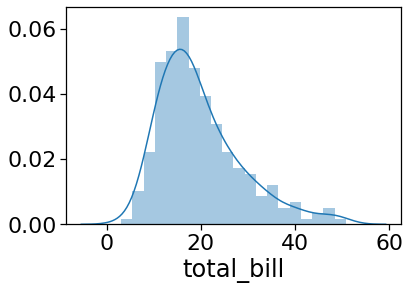

In [213]:
sns.distplot(tips['total_bill'], bins=20)
# distribusi tidak normal

## Equal Frequencies: Qualtile

- equal frequencies untuk data skewness tinggi
- equal interval untuk data kurtosis tinggi

In [216]:
# equal frequencies dgn qcut
tips['total bill eqfreq'] = pd.qcut(tips['total_bill'],5)
tips['total bill eqfreq encode'] = pd.qcut(tips['total_bill'],5, labels=range(1,6))

In [218]:
# equal interval dgn cut
tips['total bill eqintv'] = pd.cut(tips['total_bill'],5)
tips['total bill eqintv encode'] = pd.cut(tips['total_bill'],5, labels=range(1,6))

In [219]:
tips[['total_bill','total bill eqfreq','total bill eqintv','total bill eqfreq encode','total bill eqintv encode']]

# encode itu code intervalnya

,total_bill,total bill eqfreq,total bill eqintv,total bill eqfreq encode,total bill eqintv encode
0,16.99,"(16.222, 19.818]","(12.618, 22.166]",3,2
1,10.34,"(3.069, 12.636]","(3.022, 12.618]",1,1
2,21.01,"(19.818, 26.098]","(12.618, 22.166]",4,2
3,23.68,"(19.818, 26.098]","(22.166, 31.714]",4,3
4,24.59,"(19.818, 26.098]","(22.166, 31.714]",4,3
...,...,...,...,...,...
239,29.03,"(26.098, 50.81]","(22.166, 31.714]",5,3
240,27.18,"(26.098, 50.81]","(22.166, 31.714]",5,3
241,22.67,"(19.818, 26.098]","(22.166, 31.714]",4,3
242,17.82,"(16.222, 19.818]","(12.618, 22.166]",3,2


In [220]:
eqfreq = tips.pivot_table(
    index = 'total bill eqfreq',
    aggfunc = len, 
    values='tip')
eqfreq.columns = ['freq']
eqfreq


,freq
total bill eqfreq,
"(3.069, 12.636]",49.0
"(12.636, 16.222]",49.0
"(16.222, 19.818]",48.0
"(19.818, 26.098]",49.0
"(26.098, 50.81]",49.0


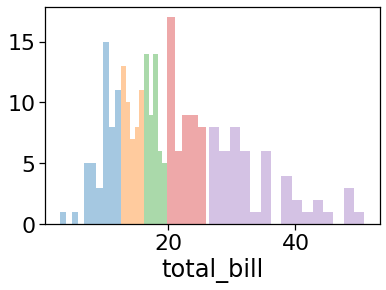

In [221]:
for i,j in zip(range(1,6),[10,5,5,5,15]):
  sns.distplot(tips[tips['total bill eqfreq encode'] == i]['total_bill'],kde = False,bins = j)


In [222]:
eqfreq = tips.pivot_table(
    index = 'total bill eqintv',
    aggfunc = len, 
    values='tip')
eqfreq.columns = ['freq']
eqfreq


,freq
total bill eqintv,
"(3.022, 12.618]",49.0
"(12.618, 22.166]",119.0
"(22.166, 31.714]",50.0
"(31.714, 41.262]",19.0
"(41.262, 50.81]",7.0


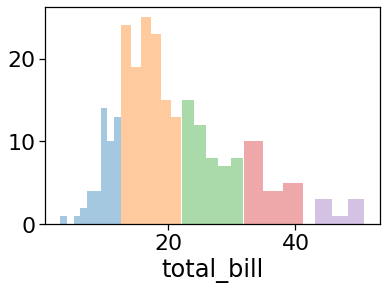

In [223]:
for i in range(1,6):
  sns.distplot(tips[tips['total bill eqintv encode'] == i]['total_bill'],kde = False)


# Binning Effect on Modelling

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer